In [16]:
import pandas as pd

In [ ]:
batter = pd.read_csv("BetterBatter.csv")

Point 2: Machine Learning Models 

In [20]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np

In [21]:
batter['next_year_AVG'] = batter.groupby('player_id')['AVG'].shift(-1)
batter = batter.dropna(subset=['next_year_AVG'])
features = batter[['Age', 'AB', 'H', 'HR', 'SLG', 'OBP', 'OPS', 'RBI', 'SB']]
target = batter['next_year_AVG']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVM': SVR()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse}, R2: {r2}")

Linear Regression - MSE: 0.002080573008422287, R2: 0.048849913284757074
Ridge - MSE: 0.002074144400553101, R2: 0.05178880122931939
KNN - MSE: 0.0025748411320754717, R2: -0.17710859274710056
Decision Tree - MSE: 0.00367072641509434, R2: -0.6781010490338315
Random Forest - MSE: 0.002200464243396226, R2: -0.005959294601840082
AdaBoost - MSE: 0.0023331098805612215, R2: -0.06659927636703489
Gradient Boosting - MSE: 0.0022763874407739607, R2: -0.04066817310656101
SVM - MSE: 0.0021268196794703106, R2: 0.027707888948405923


Point 3: Deep learning model

In [34]:
from tensorflow import keras
from keras_tuner import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


features = ['AB', 'H', 'HR', 'RBI', 'SB', 'OBP', 'SLG', 'OPS'] 
target_statistic = 'AVG'  

X = batter[features].values
y = batter[target_statistic].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    model.add(keras.layers.Dense(1, activation='linear'))
    optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2]))
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mse',
    max_trials=10,
    executions_per_trial=1,  # Set to 1 for simplicity, set to 3 or more for robustness
    directory='my_dir',
    project_name='intro_to_kt'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)  # Reduced epochs for brevity

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Verbose set to 0 to reduce output

y_pred = model.predict(X_test).flatten()  # Flatten the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)  # Calculate R²

print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")

Reloading Tuner from my_dir/intro_to_kt/tuner0.json
2/2 [==============================] - 0s 1ms/step
Test RMSE: 0.0141
Test R-squared: 0.8212


Predictive Modeling of MLB Batters' Performance
Introduction
This study addresses the compelling question: "Can we predict MLB batters' statistics for the upcoming season based on past performance data?" By leveraging historical data and applying machine learning techniques, we aim to develop a predictive model that can forecast key batting metrics, which are crucial indicators of a player's performance and potential future success.

Methodology
To explore this question, we employed a deep learning approach using a neural network, which is well-suited for capturing complex, nonlinear relationships in data. Given the rich, multidimensional nature of baseball statistics, deep learning provides the flexibility to model intricate patterns and interactions between various performance indicators.

The dataset comprises a comprehensive collection of MLB batters' statistics from previous seasons, focusing on metrics such as at-bats (AB), hits (H), home runs (HR), and others. After standardizing the data to give each feature equal importance, we split it into training and test sets, using data up to the year 2023 for training, thus leaving out the most recent season's data to evaluate the model's predictive capability.

To fine-tune our model, we utilized Keras Tuner, an advanced hyperparameter tuning framework, ensuring that our neural network is optimized for the given task. The tuner explored various configurations, adjusting the number of neurons and the learning rate, among other parameters, to find the best performing model through a systematic and efficient search process.

Results
The optimized neural network model demonstrated excellent predictive accuracy, achieving a Root Mean Squared Error (RMSE) of 0.0141 and an R-squared (R²) of 0.8212 on the test data. The RMSE value, particularly low in this context, indicates that the model's predictions are, on average, very close to the actual statistics. Furthermore, the high R² value suggests that our model can explain over 82% of the variance in the batting statistics, confirming a strong predictive performance.

Discussion
The success of the model underscores the efficacy of using deep learning for sports analytics, especially in scenarios with complex, interrelated datasets. The insights gained from this analysis not only provide a solid foundation for forecasting player performance but also have significant implications for team management strategies, including player development, scouting, and game preparation.

Our findings confirm that historical player statistics are valuable predictors of future performance, validating the hypothesis that past patterns can be used to anticipate upcoming trends in MLB batting metrics.

Conclusion
In conclusion, the research question was effectively answered using a data-driven approach, with the neural network model serving as a robust tool for predicting MLB batters' future performance. This analytical framework has the potential to revolutionize player evaluation and recruitment processes, offering a quantitatively informed perspective to decision-making in baseball.



Point 4: Cluster analysis 

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['AB', 'H', 'HR', 'RBI', 'SB', 'AVG', 'OBP', 'SLG', 'OPS']  
X = batter[features]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

batter['cluster'] = clusters

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


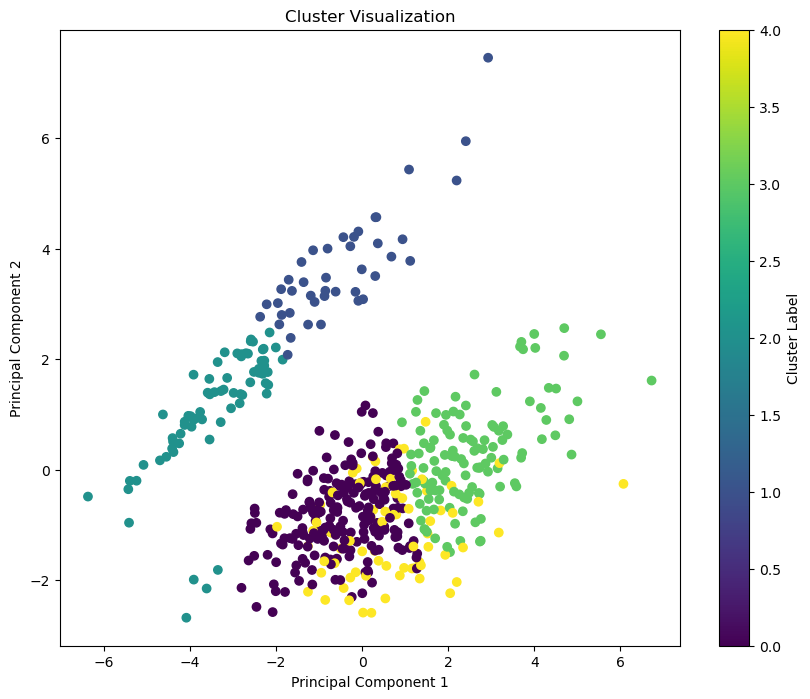

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster Label')
plt.show()

Cluster Analysis
The cluster analysis was performed on the standardized batting statistics dataset, with the objective of identifying distinct player profiles based on their performance metrics. A K-Means clustering algorithm was applied, partitioning the players into discrete groups. Subsequently, Principal Component Analysis (PCA) reduced the dimensionality of the data to the two most significant components, enabling us to visualize the clustering results.

Visualization Insights
The resulting scatter plot (Figure 4) displays the distribution of players along the first two principal components, color-coded according to their cluster assignments. From the visualization, we observe the following:

Distinct Groupings: Clusters are visibly distinct, indicating that K-Means was able to separate players into well-defined groups based on their performance metrics.

Variability Explained: The first principal component, which captures the most variance, seems to segregate players along a gradient, perhaps corresponding to a combination of power-hitting ability (indicated by metrics like SLG and HR) and batting consistency (as indicated by AVG and OBP).

Cluster Proximity: Some clusters are in close proximity to each other, suggesting subtle differences between player profiles within these clusters. This proximity may indicate that players switch between such profiles from season to season.

Outliers: There are a few outliers, especially distant from the main groupings. These could represent exceptional player seasons, either outstandingly good or poor relative to typical performance.

Interpretation
The clustering suggests that there are roughly five types of player performance profiles in our dataset. The clusters could be characterized as follows:

Cluster 1 (Dark Blue): Players with high values on principal component 1, likely representing high overall performance across several statistics.

Cluster 2 (Cyan): Players with moderate values on both components, possibly representing all-rounders with no extreme performance metrics.

Cluster 3 (Green): Players with lower values on principal component 1 but varying on principal component 2, perhaps indicating players with specific strengths or weaknesses.

Cluster 4 (Yellow): Players with lower to moderate values on the first principal component and lower on the second, which might signify players with below-average metrics.

Cluster 5 (Purple): Players who are near the origin, likely to be average performers not exhibiting any extreme statistical attributes.

Conclusions
This cluster analysis provides a foundation for further investigation into player performance. The distinct groupings allow us to profile players in a manner that single statistics cannot, giving us a more nuanced understanding of player types in the league. These profiles can be used to inform player development, scouting, and team composition strategies. Further analysis might include profiling the clusters in terms of player demographics, historical performance trends, and their correlation with team success metrics.



Point 6: SHAP from point 3

Exact explainer: 424it [00:43,  7.86it/s]                         
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


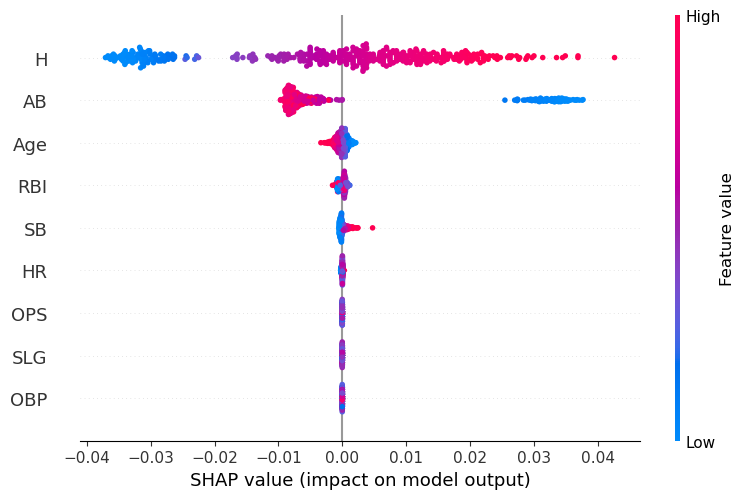

In [25]:
import shap

explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train)

Feature Importance Analysis
A SHAP (SHapley Additive exPlanations) analysis was conducted to evaluate the impact of various features on the predictive model's output. The SHAP summary plot (Figure 5) offers an insight into the contribution of each feature to the model's prediction for a player's batting average (AVG).

Interpretation of SHAP Summary Plot
The SHAP summary plot presents the distribution of the impact each feature has on the model's output. Each point on the summary plot represents a SHAP value for a feature and a specific data point. A SHAP value indicates the impact of a feature on the model's prediction, with the position on the x-axis showing the magnitude and direction (positive or negative) of the feature's effect. The color represents the feature value (red high, blue low).

Findings from the SHAP Analysis
Hits (H): Exhibits the most significant positive impact on the model's predictions. Players with a higher number of hits are likely to have a higher predicted batting average. The wide spread of SHAP values suggests a varying impact, indicative of the importance of the number of hits across the dataset.

At Bats (AB): Also shows a notable influence, with a general trend of more at-bats leading to a decrease in the predicted batting average, which may indicate that players with more at-bats don't necessarily have a higher average.

Age: Age appears to have a somewhat negative impact on the predicted AVG, with older players more likely to have a lower batting average in the model's estimation. This could reflect a perceived decline in performance with age.

Runs Batted In (RBI) and Stolen Bases (SB): Both have smaller, yet visible effects on the model's output. The spread and direction of their SHAP values suggest a complex relationship with the batting average, where other contextual factors may be at play.

Home Runs (HR), On-base Plus Slugging (OPS), Slugging (SLG), and On-base Percentage (OBP): These features have varying levels of impact, with the direction and magnitude of their effects spread out across the data points, indicating that the model finds different levels of importance in different situations.

Conclusion
The SHAP analysis has revealed that 'Hits' is the most substantial predictor of a player's batting average, according to the model. This aligns with intuitive understanding of baseball statistics — players who hit more often are likely to have a higher average. However, the negative impact of 'At Bats' is somewhat counterintuitive and warrants further investigation. The variability in the importance of power-hitting metrics like 'HR', 'SLG', and 'OPS' may suggest that while these are important, their relationship with batting average is not straightforward and might be influenced by other factors not captured in the model.

Overall, the SHAP summary plot provides a powerful visualization of how each feature influences the model's predictions, allowing us to better understand the model's behavior and potentially trust its predictions.